# Graph Lab

## Header information:

  - Author #1: Evan Placenis (placenie@mcmaster.ca)
  - Author #2: Jad Haytaoglu (haytaogj@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/haytaogj/l1-graph-lab.git
  - Avenue to Learn group name: Graph 45

[0, 1, 2, 3, 4, 5, 6, 7] dev_x
[1, 25, 216, 23, 27, 4, 5, 2] dev_y


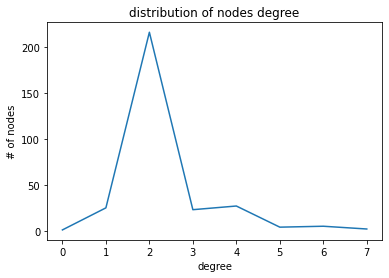

In [10]:
#CREATE GRAPH AND PLOT DEGREE METRIC

from src.Metrics.MetricsStrategy import *
from src.Graphing.BuildGraph import *
from src.Plotting.DegreePlot import *

#i) Build Graph
graph = BuildGraph().build_graph()

#ii) Compute other metrics..?

#iii) Node Degree Distribution Plot
nodeDegs = nodeDegreeStrategy().create_metric(graph.get_adjList())[0] #list of (node,deg) tuples

plot = DegreePlot().graph_degree_plot(nodeDegs)



Design Choice Justification:

Design Pattern Choices:
In our program we utilized two instances of the strategy design pattern and a strong object-oriented architecture to accomplish the functionality of the project. We decided that implementing the strategy design pattern was an appropriate choice for creating both graph metrics and graph algorithms for multiple reasons. By choosing Strategy we are able to easily add more metric extractions and graph algorithms to our software while also allowing us to safely remove specific functionalities without breaking existing code catering to the open/closed principle. Strategy also required us to create a separate class for each task, allowing us to achieve the single responsibility principle which makes the code more readable and maintainable. In addition, each low level metric extraction and algorithm class depends on abstractions which decouples the dependencies and allows for easier re-use of functionality. By defining a family of algorithms, it allows a specific algorithm to be chosen and switched at runtime which was helpful when benchmarking and testing our code.


In [ ]:
from src.App import App
from src.Algorithms.AlgorithmsStrategy import *

def process_graph(processingStrategy: GraphAlgoInterface):
    shortestPath = processingStrategy.execute(graph, start, stop)
    return shortestPath

app = BuildGraph()
graph = app.build_graph()
start = 1
stop = 10
print("A STAR ---------------------------------------------")
# needed to add a second variable to fit strategy pattern
shortest_path = process_graph(AStarStrategy())
print("Dijkstra ---------------------------------------------")
shortest_path = process_graph(DijkstraStrategy())
print(shortest_path)



The above example shows the functionality of both the Metric Strategy and the DegreePlot class. We decided to separate the responsibility of plotting the degrees of all nodes to uphold the single responsibility and separation of concerns principle. 

Graphing

For our graph implementation we didn't see the need to apply a design pattern because we are working with fixed data, and we won’t need to significantly modify the functionality of the graph in the future. For this reason, we have simply decided to delegate the responsibility between the BuildGraph and Graph classes. BuildGraph is a graph builder responsible for extracting the data from the csv files and depends on the Graph class to actually construct the graph for the transit system. The Graph class is what actually takes in nodes and edges and puts together an adjacency list to represent the graph. It also houses other context for the nodes such as the weight of an edge, and the transit line a certain node is on. This again follows the single responsibility and separation of concerns principle.

In [ ]:
app = BuildGraph()
graph = app.build_graph()
graph.print_adj_list()
graph.print_node_loc()
print(graph.get_node_loc(7))

Itinerary

With our Itinerary class, we chose to rank paths of the same length in a simpler approach than what we had originally planned. Originally, we planned to identify paths of the same lengths and call a method from the itinerary class to see which path had less line changes. After implementing our algorithms however, we noticed our algorithms would strictly return the first occurrence of a shortest path in the graph, regardless if there were multiple of the same length. The only solution to this problem with our original implementation was to run the algorithm to find the shortest path, then remove the edges in this path and run the algorithm again to see if there was another path with equal length, and pass these two paths into the itinerary function to find which path had less transfers. This solution simply increased the run time of our algorithms too much, thus we decided to take a different route.

In our final implementation we decided that the user of this program was solely interested in finding the quickest path to their destination. To accomplish this we integrated some new logic into the algorithms that would add a weight to a given path to simulate the amount of time it takes to change lines. With this change, the algorithms only needed to execute once and find the shortest path for the user, including the considerations of line transfers. If there was an equal length path with the same amount of line changes there is no issue with our algorithm only returning the first occurrence as they would essentially be equivalent.


BenchMarking:

Our benchmarking consists of a BenchmarkSpace class which depends on the GraphAlgoInterface. Within this class we have implemented a method “withNbStations’ which is given a list of integers and generates a random graph with the corresponding number of nodes for each integer. This list of graphs can then be passed into either “withOpsAlgoStrategies” or “withTimeAlgoStrategies” alongside the corresponding KPI algorithm, start node, and end node. These functions will run on each graph storing the metrics into an array. To increase code reusability, this array is passed to a function which is solely responsible for extracting the metrics into a Dijksta and AStar list, after which we can return the output. While we were originally planning to run our benchmarking using pyperf, we decided upon this implementation due to its compatibility to our existing strategy pattern. We are able to lean on the flexibility of our strategy design pattern and easily call which GraphicAlgoInterface class we need in order to compute our KPI’s.  In addition, this implementation allows this class to adhere to the interface segregation principle as this class isn’t forced to depend on methods or classes it does not use. 
The one downside of this implementation of generating a random graph every time is that sometimes a graph is generated where there is no path from the start node to the end node. On the upside we thought this was an important part of the code to test as well.

We decided to measure the data accesses, iterations, and comparisons in a joined “ops” (operations) class as well as the execution time of both our algorithms. This way it was easy to compile all the KPIs and measure our algorithms in an effective and clear way. By doing it like this, every operation was taken into account by the benchmark and it was easier to interpret the results and the significance of them.

Subway Patrol Planning:

This problem would have been solved by creating an algorithm to find a Hamilton Cycle in a graph given a start node. Unfortunately, we were unable to completely finish this algorithm as it would have been necessary to recreate a graph from our dataset using an adjacency matrix instead of what we originally used (adjacency list) . However, we would have used backtracking the adjacency matrix to compute and return the Hamiltonian cycle and solved this problem. 


Analysis of Benchmark:

![ alt text for screen readers](./src/pictures/graph1.png)

From the results of our benchmark it is clear that AStar has less operations than the Dijkstra algorithm. In addition to this, we can see that in the beginning the rate of increase (slope) of the two algorithms is fairly similar. As the graph size increases the number of operations increase at a faster rate in Dijkstra than AStar. Interestingly, the relationship between the number of operations and graph size becomes linear in AStar while it is exponential in the Dijkstra algorithm. It is clear that AStar is far better at handling large data structures when compared to Dijkstras.

![ alt text for screen readers](./src/pictures/Graph2.png)

Similar to the findings in the previous benchmark, AStar proves to execute faster with larger data structures than Dijkstra's Algorithm. It is interesting to see from benchmark data that AStar takes longer to execute than Dijkstra in the beginning. In both algorithms there is a linear relationship between the execution time and the size of the graph however Dijkstra has a much steeper slope than AStar.

Distribution of Node Degree

APP:
In our program, we delegated each small task into separate classes to keep a strong object-oriented architecture. Most of our classes are used by our client class “APP” and we call the functionality of each class in the main function. This follows interface segregation as App is never forced to implement an interface that it does not use.

UML 1:

![ alt text for screen readers](./src/pictures/UML1.png)

UML 2:

![ alt text for screen readers](./src/pictures/UML2.png)

Modifications to the Design:

Measuring KPIs:
In the previous week we had a very simple and flawed implementation of our benchmarking. We counted our KPI’s and execution time in the same file as the pathfinding algorithms and returned all three variables. This implementation was wrong for many reasons. Incrementing a count variable throughout the algorithms reduced the readability of the code. In addition, whenever we needed to access a specific value from the benchmarking space (such as time), we needed to call the function and create variables for both path and ops while only passing the variable we were using to carry out the rest of the execution. This ruined the Open Closed and Single Responsibility principles from our design pattern as we were calculating three different outputs at once. 

In order to solve these redundancies and increase the principles in our program we utilized the existing strategy pattern we had to create separate classes that were responsible for returning a single metric we needed. With this we are able to get the value we need by calling the associated class while only needing to modify the BenchmarkingSpace class slightly. Not only did this increase the readability of our algorithms and benchmark, it made executing and plotting the benchmarks smoother as well. In addition, if we ever needed to add or remove functionality of our benchmark it would be much easier and makes our code more maintainable. Lastly, this implementation adheres to the dependency inversion principle as these entities depend on abstractions and not concretions which allows for greater decoupling.


In [ ]:
algorithms = [AStarStrategy(), DijkstraStrategy()]
algorithmsOps = [AStarOps(), DijkstraOps()]
algorithmsTime = [AStarTime(),DijkstraTime()]
space = BenchmarkSpace()
graphs = space.withNbStations([10,50,100,250])
 
# -------------- algo Ops benchmark ---------------
dCount, aCount = space.withOpsAlgoStrategies(graphs, algorithmsOps, 1, 10)
# -------------- algo Time benchmark ---------------
dtime, atime = space.withTimeAlgoStrategies(graphs, algorithmsTime, 1, 10)

Plotting: 
In week one we had done very little plotting, thus we only had one class for plotting the degree of nodes in our graph. In week two we have plotted all of our benchmarks while upholding the SOLID principles of our program. We have done this by implementing a strategy pattern for plotting the benchmarks. The main reason why we have done this is because if we ever need to implement a new benchmark, we will need to implement an associated plot with it. Since our benchmarking already consists of the strategy principle, having the plots as a strategy pattern allows us to easily extend these plots alongside our benchmarks. In addition to this, we also separate the responsibilities and improve the maintainability of our classes as well.


In [ ]:
class MetricPlotInterface(ABC):
    @abstractmethod
    def plot_graph(self, metric1, metric2):
        """Method to plot graph given data using matplotlib"""
        pass

Splitting Up the Work

Evan:
- Metrics Strategy
- Algo Strategy
- KPI Benches
- test_
- App
- Plotting
- BenchMarkSpace

Jad:
- Graph
- BuildGraph
- Dijkstra
- Astar
- test_
- itinerary
- Plotting

Self Reflections:

Jad:
backward: 
This project was a unique experience for me. The actual concrete implementation of complex recently-learned algorithms and design patterns was something that I had never experienced before. In addition, the topic of metrics and actual data analysis was something brand new, especially on what was a decently-sized, realistic data set. The closest thing I have ever worked on was the assignment from our first software design course last year where we learned to implement design patterns we had just learned.

Inward:
Although there was a lot we were unable to finish or figure out, we were able to accomplish a great amount and I am proud of how much we did complete. This is by far the largest and most complex project I have ever worked on. The concept of the project was one that intrigued me greatly, particularly because of how realistic the practical application was and how it was more implementation than theory (something that our courses have been dominated by). However, there were things I disliked about it as well. First, there was simply far too much to accomplish for 2 people who have little to no background knowledge or experience implementing anything of the sort - especially at such a scale - which was just demoralizing and gave a sense of constant incompleteness. Second, the concept and realization of benchmarking and thorough testing was something we have not learned at all and was difficult and rigorous to figure out - not enjoyable. I understand there are many aspects to a complex project and it would be almost impossible to like everything but the perpetual state of feeling like nothing was getting done because there was WAY too much asked of us led to a significant dislike of what could have been a fun project.

Outward:
One thing I would appreciate for people to notice about our work was the quality and detail. We spent a lot of time and effort on making sure things worked the way they were supposed to and organizing it well. And this consumed a substantial portion of our time.

Forward:
If I were to do this project again I would definitely make a plan as to how to go about each aspect of the project, and organize each piece to figure out how it would all fit together. This was one thing we struggled with in the beginning as we weren’t sure where to put things and how they would ultimately connect, causing a lot of time to be spent refactoring and reorganizing files and code to interleave nicely.



Evan:
Backward:
The only project I have done that is similar to this was assignment three of the software design course last year. It was the first time I implemented design patterns where I used Factory and Decorator combined. It definitely helped with implementing the strategy pattern in this project. Other than that this is the first time ive used data from files extensively, created so many classes, and benchmarked. Earlier today I had a conversation with my lab partner about being proud of making a project as big as this since it is my first one.

Inward:
Overall I feel pretty good about this work. I feel like I have a better sense of how to make object oriented code with multiple classes and design patterns. I now understand why design patterns are so important and it makes the code feel more organized. I really liked that we were able to implement algorithms found online as this seems like a very practical skill to have in the real world. The only part I disliked is that we were not able to finish week two before submitting.

Outward:
The biggest thing I want people to know about this work is how well structured it is, as I know adhering to the SOLID design pattern is what separates coders and software engineers. I would like to show off the strategy design pattern, and how we were able to benchmark with all the child classes of GraphAlgoInterface. Lastly, the file structures appear fairly organized to me and I would like people to notice this as well.

Forward:
The biggest thing I would change if I could do this project over again is to start earlier. It seemed pretty daunting at first but I now know that I just need to start small and that I will pick up momentum. I also learned that things tend to change a lot in the beginning and it is good to keep an open mind about how to tackle the problem. It's not good to get too attached to one solution. Lastly, I learned that it's good to get stuff down in the beginning and not to worry too much about the structure of the code as that is easy to change later.
